In [3]:
# import library for manipulate with data
import numpy as np
import pandas as pd

# library for create 3D plot from our data
import matplotlib.pyplot as plt

1, Load the data set
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [4]:
# import our data set
df = pd.read_csv('irisData.csv')
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


2, Plot the first 3 columns of the data set and target column in 3d scatter plot.

HINT: Use the target column as a hue for the points.

LINK: [https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

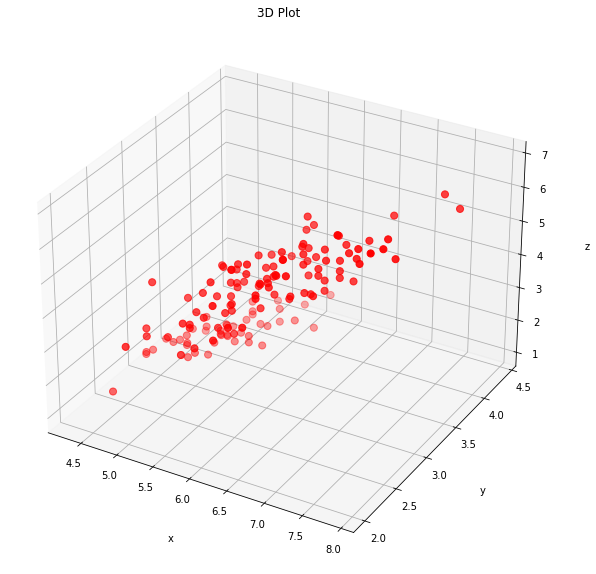

In [5]:
x = df['sepal.length']
y = df['sepal.width']
z = df['petal.length']

# set the size for diplaying 
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.grid()

ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Plot')

# Set axes label
ax.set_xlabel('x', labelpad = 20)
ax.set_ylabel('y', labelpad = 20)
ax.set_zlabel('z', labelpad = 20)

plt.show()

3, Copy the implementation of the Principal Component Analysis algorithm from SMLH.

In [6]:
class myPCA: 
    def __init__(self, n_components: int = 2 , method : str = 'svd')-> None:
        ''' The constructor of the PCA algorithm. :param n_compoents: int, default = 2 
            The dimension to which the data will be reduced. :param method: str, default = ’svd’ 
            The method used by PCA to reduce the dimensionality of the data. ''' 
        self.__n_components = n_components 
        if method in ['svd', 'eigen']: 
            self.__method = method 
        else: raise ValueError(f"'{method}' is not a method implemented in this model") 
  

    def fit(self, X : 'np.array'): 
        ''' The fitting method. 
            :param X: np.array 
            The data on which we want to fit the PCA '''
        if self.__method == 'svd': 
            U, S, V = np.linalg.svd(X) 
            self.__V = V[:self.__n_components, :] 
        
        elif self.__method == 'eigen': 
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues self.eig_vals, 
            self.eig_vecs = np.linalg.eig( corr_mat) 
            
            # Sorting the list of tuples (eigenvalue, eigenvector) 
            self.eig_pairs = [(np.abs(self.eig_vals[i]), 
            self.eig_vecs[:, i]) for i in range(len(self.eig_vals))] 
            self.eig_pairs.sort(key = lambda x: x[0], reverse = True) 
    
            # Calculating the explained ration 
            total = sum(self.eig_vals) 
            self.explained_variance_ratio = [(i / total) * 100 
                                             
                                             
    for i in sorted(self.eig_vals, reverse = True)] 
            self.cumulative_variance_ratio = np.cumsum( 
                self.explained_variance_ratio
            ) 
            
            # Creating the projection matrix 
            self.matrix_w = np.hstack(
                (self.eig_pairs[i][1].reshape(np.size(X, 1), 1) 
                for i in range(self.__n_components))) 
        return self 
    
    def transform(self, X : 'np.array') -> 'np.array': 
        ''' The transform function. 
        :param X: np.array The data that we must reduce. ''' 
        if self.__method == 'svd': 
            return X.dot(self.__V.T) 
        elif self.__method == 'eigen': 
            return X.dot(self.matrix_w)

In [7]:
# set the values of white Setosa = 1, Versicolor = 2, Virginica = 0 
def flowers_to_number(x):
    if x == "Setosa":
        return 1
    if x == "Versicolor":
        return 2
    if x == "Virginica":
        return 0

df['variety'] = df["variety"].map(flowers_to_number)

In [8]:
print(df['variety'])

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: variety, Length: 150, dtype: int64


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

4, Create an instance of the Scratch made PCA algorithm using the eigenvector algorithm.

In [32]:
def pca(X, n_components):
    # Calculate the covariance matrix
    cov_matrix = np.cov(X.T)

    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvectors and eigenvalues in descending order based on the eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select the top n_components eigenvectors
    eigenvectors = eigenvectors[:, :n_components]
    
    # Project the data onto the eigenvectors
    X_transformed = np.dot(X, eigenvectors)
    
    return X_transformed

# Transform the data using the pca function
X_transformed = pca(X, 2)
X_transformed

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709],
       [ 3.2215055 , -6.06828303],
       [ 2.68182738, -5.23749119],
       [ 2.87622016, -5.49033754],
       [ 2.6159824 , -4.74864082],
       [ 2.82960933, -5.21317833],
       [ 2.99541804, -5.97202148],
       [ 2.8896099 , -5.34168252],
       [ 2.71625587, -5.09184058],
       [ 2.27856139, -4.81555799],
       [ 2.85761474, -6.50571721],
       [ 3.1163261 , -6.66501491],
       [ 2.87883726, -6.13763209],
       [ 2.85406843, -5.63880172],
       [ 3.30254481, -6.19979162],
       [ 2.91437873, -5.84051289],
       [ 3.19210892, -5.71829851],
       [ 2.9586599 , -5.75994864],
       [ 2.28642572, -5.46042065],
       [ 3.19963195, -5.42566143],
       [ 3.14661108, -5.28967072],
       [ 2.99569623, -5.1809357 ],
       [ 3.03354506, -5.45790407],
       [ 2.94004523, -5.69467143],
       [ 2.86283042,

5, Create an instance of the Scratch made PCA algorithm using the SVD algorithm.

In [37]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean center the data
        self.mean = X.mean(axis=0)
        X = X - self.mean

        # Calculate the covariance matrix
        cov = np.cov(X, rowvar=False)

        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort the eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Mean center the data
        X = X - self.mean

        # Project the data onto the principal components
        X_transformed = np.dot(X, self.components)
        return X_transformed

# Create an instance of the PCA class with 2 components
pca = PCA(2)

# Fit the PCA model to the data
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X_train
pca.fit(X)

# Transform the data using the PCA model
X_transformed = pca.transform(X)
print(X_transformed)


[[ 3.68829944e-01 -9.08750720e-02]
 [ 2.21418232e-01 -1.01450843e+00]
 [ 1.78740505e+00  2.89367112e-01]
 [-2.36974355e+00 -1.94419421e-01]
 [ 1.81554310e+00  5.54869071e-01]
 [-1.94322916e+00  5.94360704e-01]
 [-2.12289165e+00  1.15860840e+00]
 [-2.81736407e-01 -2.63465316e+00]
 [ 1.38237944e+00  1.58026272e-01]
 [ 1.93493849e+00  9.25168099e-01]
 [ 1.09040767e+00 -1.78725296e+00]
 [ 1.85287080e+00 -8.50164050e-01]
 [ 4.21209441e-02 -1.31375786e+00]
 [ 2.68416733e+00  6.45621665e-01]
 [ 7.01894648e-01  7.19774057e-01]
 [-2.16781017e-03 -1.56922700e+00]
 [ 1.21332482e+00 -5.70886175e-01]
 [ 1.00837593e+00 -3.70152947e-01]
 [ 2.46987372e-01 -1.54612435e+00]
 [ 1.41913721e+00 -9.99164959e-01]
 [ 1.03614878e+00  7.58846137e-01]
 [ 1.43141865e+00  1.68520498e-01]
 [ 4.02012542e-01  8.21802652e-01]
 [-2.16045949e+00 -3.72591526e-01]
 [ 1.04394426e+00 -7.55767130e-01]
 [ 1.86924475e-01 -8.67776734e-01]
 [-1.08450647e-01 -4.35058308e-01]
 [ 1.59943466e-01 -1.34052792e+00]
 [ 5.48990725e-01 -1

6, Create an instance of sklearn and implement a PCA algorithm.

In [40]:
import numpy as np
from sklearn.decomposition import PCA

# Create an instance of the PCA class with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X_train
pca.fit(X)

# Transform the data using the PCA model
X_transformed = pca.transform(X)
print(X_transformed)


[[ 3.68829944e-01 -9.08750720e-02]
 [ 2.21418232e-01 -1.01450843e+00]
 [ 1.78740505e+00  2.89367112e-01]
 [-2.36974355e+00 -1.94419421e-01]
 [ 1.81554310e+00  5.54869071e-01]
 [-1.94322916e+00  5.94360704e-01]
 [-2.12289165e+00  1.15860840e+00]
 [-2.81736407e-01 -2.63465316e+00]
 [ 1.38237944e+00  1.58026272e-01]
 [ 1.93493849e+00  9.25168099e-01]
 [ 1.09040767e+00 -1.78725296e+00]
 [ 1.85287080e+00 -8.50164050e-01]
 [ 4.21209441e-02 -1.31375786e+00]
 [ 2.68416733e+00  6.45621665e-01]
 [ 7.01894648e-01  7.19774057e-01]
 [-2.16781017e-03 -1.56922700e+00]
 [ 1.21332482e+00 -5.70886175e-01]
 [ 1.00837593e+00 -3.70152947e-01]
 [ 2.46987372e-01 -1.54612435e+00]
 [ 1.41913721e+00 -9.99164959e-01]
 [ 1.03614878e+00  7.58846137e-01]
 [ 1.43141865e+00  1.68520498e-01]
 [ 4.02012542e-01  8.21802652e-01]
 [-2.16045949e+00 -3.72591526e-01]
 [ 1.04394426e+00 -7.55767130e-01]
 [ 1.86924475e-01 -8.67776734e-01]
 [-1.08450647e-01 -4.35058308e-01]
 [ 1.59943466e-01 -1.34052792e+00]
 [ 5.48990725e-01 -1

7, Apply StandardScaler from sklearn on the data.

In [41]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the StandardScaler to the data
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X_train
scaler.fit(X)

# Transform the data using the StandardScaler
X_scaled = scaler.transform(X)
print(X_scaled)


[[ 2.17009665e-01 -9.24942723e-02]
 [ 1.30276560e-01 -1.03258481e+00]
 [ 1.05166128e+00  2.94523018e-01]
 [-1.39429367e+00 -1.97883561e-01]
 [ 1.06821695e+00  5.64755657e-01]
 [-1.14334401e+00  6.04950946e-01]
 [-1.24905261e+00  1.17925234e+00]
 [-1.65766159e-01 -2.68159707e+00]
 [ 8.13355057e-01  1.60841964e-01]
 [ 1.13846601e+00  9.41652625e-01]
 [ 6.41566681e-01 -1.81909801e+00]
 [ 1.09017958e+00 -8.65312163e-01]
 [ 2.47828359e-02 -1.33716623e+00]
 [ 1.57929220e+00  6.57125269e-01]
 [ 4.12976020e-01  7.32598898e-01]
 [-1.27548147e-03 -1.59718729e+00]
 [ 7.13887841e-01 -5.81058151e-01]
 [ 5.93301399e-01 -3.76748285e-01]
 [ 1.45320757e-01 -1.57367299e+00]
 [ 8.34982340e-01 -1.01696795e+00]
 [ 6.09642202e-01  7.72367160e-01]
 [ 8.42208413e-01  1.71523175e-01]
 [ 2.36533417e-01  8.36445426e-01]
 [-1.27115653e+00 -3.79230314e-01]
 [ 6.14228856e-01 -7.69233292e-01]
 [ 1.09981357e-01 -8.83238668e-01]
 [-6.38094573e-02 -4.42810121e-01]
 [ 9.41064535e-02 -1.36441327e+00]
 [ 3.23011445e-01 -1

8, Train all created instances of PCA on the iris data.

In [43]:
from sklearn.decomposition import PCA

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Create a list of PCA instances
pca_list = [PCA(n_components=2), PCA(n_components=3), PCA(n_components=4)]

# Train each PCA instance on the data
for pca in pca_list:
    pca.fit(X)

X_transformed = pca_list[0].transform(X)
print(X_transformed)


[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

9, Use each created instance of PCA to reduce the dimensionality of the data set to 2, creating in such a way 3 separated data sets.

In [45]:
# compontete 2, create new data set - colonae auto select by PCA = 3 col

# Create a list of PCA instances
pca_list = [PCA(n_components=2), PCA(n_components=3), PCA(n_components=4)]

# Train each PCA instance on the data
for pca in pca_list:
    pca.fit(X)

# Use each PCA instance to transform the data and store the results in a separate list
X_transformed_list = []
for pca in pca_list:
    X_transformed = pca.transform(X)
    X_transformed_list.append(X_transformed)

X_transformed_1 = X_transformed_list[0]
print(X_transformed_1)


[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

10, Create a plot that combines 3 scatter plots and plots each of the result data sets in a separate window. Each window should related which version of the PCA was used.
HINT: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

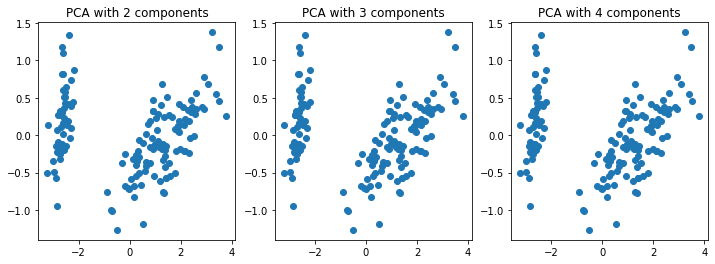

In [46]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first transformed data set in the first subplot
ax[0].scatter(X_transformed_list[0][:, 0], X_transformed_list[0][:, 1])
ax[0].set_title("PCA with 2 components")

# Plot the second transformed data set in the second subplot
ax[1].scatter(X_transformed_list[1][:, 0], X_transformed_list[1][:, 1])
ax[1].set_title("PCA with 3 components")

# Plot the third transformed data set in the third subplot
ax[2].scatter(X_transformed_list[2][:, 0], X_transformed_list[2][:, 1])
ax[2].set_title("PCA with 4 components")

plt.show()


11, Try to make a conclusion about what you see comparing the results of each algorithm and the 3d scatter plot that you made before.

Dacă să vorbim despre graficele de aici cu ele este mai ușor de analizat cum se pun datele, pe când dacă să luăm cel cu 3D nu prea este vizibil datele care sunt mai aproape de origine

12, Retrain a sklearn PCA model on the iris data set with n_components set to 1.

In [49]:
# Create an instance of the PCA class with n_components set to 1
pca = PCA(n_components=1)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data using the PCA model
X_transformed = pca.transform(X)
print(X_transformed)


[[-2.68412563]
 [-2.71414169]
 [-2.88899057]
 [-2.74534286]
 [-2.72871654]
 [-2.28085963]
 [-2.82053775]
 [-2.62614497]
 [-2.88638273]
 [-2.6727558 ]
 [-2.50694709]
 [-2.61275523]
 [-2.78610927]
 [-3.22380374]
 [-2.64475039]
 [-2.38603903]
 [-2.62352788]
 [-2.64829671]
 [-2.19982032]
 [-2.5879864 ]
 [-2.31025622]
 [-2.54370523]
 [-3.21593942]
 [-2.30273318]
 [-2.35575405]
 [-2.50666891]
 [-2.46882007]
 [-2.56231991]
 [-2.63953472]
 [-2.63198939]
 [-2.58739848]
 [-2.4099325 ]
 [-2.64886233]
 [-2.59873675]
 [-2.63692688]
 [-2.86624165]
 [-2.62523805]
 [-2.80068412]
 [-2.98050204]
 [-2.59000631]
 [-2.77010243]
 [-2.84936871]
 [-2.99740655]
 [-2.40561449]
 [-2.20948924]
 [-2.71445143]
 [-2.53814826]
 [-2.83946217]
 [-2.54308575]
 [-2.70335978]
 [ 1.28482569]
 [ 0.93248853]
 [ 1.46430232]
 [ 0.18331772]
 [ 1.08810326]
 [ 0.64166908]
 [ 1.09506066]
 [-0.74912267]
 [ 1.04413183]
 [-0.0087454 ]
 [-0.50784088]
 [ 0.51169856]
 [ 0.26497651]
 [ 0.98493451]
 [-0.17392537]
 [ 0.92786078]
 [ 0.66028

13, Create a line plot of the **explained_variance_ratio_.**

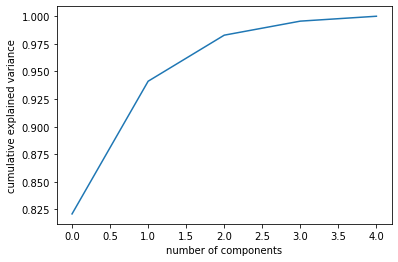

In [55]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

14, Try to make a conclusion based on that plot.

concluziile pe care le pot trage este că cu cât varianță explicată cumulativă cu atât numărul de componente crește

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


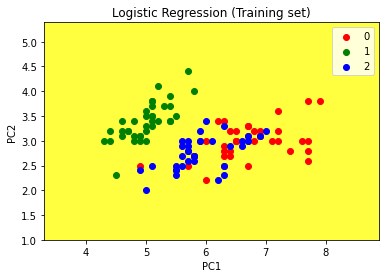

In [47]:
# Predicting the training set
# result through scatter plot
# Setosa = 1, Versicolor = 2, Virginica = 0 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
    X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
    cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


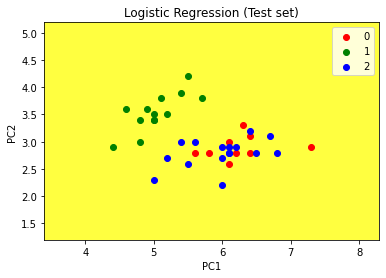

In [48]:
# Visualising the Test set results through scatter plot
# Setosa = 1, Versicolor = 2, Virginica = 0 
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                    stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1,
                    stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
        X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
        cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()
